<a href="https://colab.research.google.com/github/isa-ulisboa/greends-pml/blob/main/perceptron_mini_batch_animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

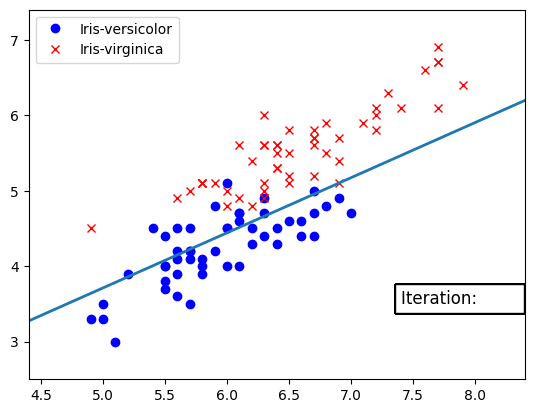

In [1]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

class Perceptron():
    def __init__(self, eta=0.1, n_iter=50, batch_size=10, nameA='', nameB=''):
        self.eta = eta
        self.n_iter = n_iter
        self.batch_size = batch_size
        self.nameA = nameA
        self.nameB = nameB

    def mini_batch_fit(self, X, y):
        # randomly shuffle the data
        data = list(zip(X, y))
        random.shuffle(data)

        # iterate over mini-batches
        for i in range(0, len(data), self.batch_size):
            batch = data[i:i+self.batch_size]
            X_batch, y_batch = zip(*batch)
            self.step_fit(X_batch, y_batch)

        return self

    def step_fit(self, X, y):
        for xi, label in zip(X, y):
            update = self.eta * (label - self.predict(xi))
            self.w_[1:] += update * xi
            self.w_[0] += update
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

    def init_plot(self):
        self.line.set_data([], [])
        return self.line,

    def animate(self, iteration_number, X, y):
        self.mini_batch_fit(X, y)
        x, y = self.plot_line(X)
        self.line.set_data(x, y)
        if iteration_number % 2 == 0:
            self.ax.text(max(X[:, 0]) - 0.5, min(X[:, 1]) + 0.5, f'Iteration: {iteration_number}', fontsize=12)
        else:
            self.ax.text(max(X[:, 0]) - 0.5, min(X[:, 1]) + 0.5, 'Iteration:' + ' ' * 8, fontsize=12,
                         bbox=dict(facecolor='white', alpha=1))
        return self.line,

    def plot_line(self, X):
        x = []
        y = []
        slope = -(self.w_[0] / self.w_[2]) / (self.w_[0] / self.w_[1])
        intercept = -self.w_[0] / self.w_[2]
        for i in np.linspace(np.amin(X[:, 0]) - 0.5, np.amax(X[:, 0]) + 0.5):
            x.append(i)
            y.append((slope * i) + intercept)

        return x, y

    def animated_fit(self, X, y):
        self.w_ = [random.uniform(-1.0, 1.0) for _ in range(1 + X.shape[1])]

        self.fig = plt.figure()
        self.ax = plt.axes(xlim=(min(X[:, 0]) - 0.5, max(X[:, 0]) + 0.5), ylim=(min(X[:, 1]) - 0.5, max(X[:, 1]) + 0.5))
        self.ax.plot(X[0:50, 0], X[0:50, 1], "bo", label=self.nameA)
        self.ax.plot(X[50:100, 0], X[50:100, 1], "rx", label=self.nameB)
        self.ax.legend(loc='upper left')
        self.line, = self.ax.plot([], [], lw=2)
        anim = FuncAnimation(self.fig, self.animate, init_func=self.init_plot, fargs=(X, y,), frames=self.n_iter,
                             interval=200, blit=True)
        anim.save('learning_process.gif', writer='imagemagick')


#import dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

SPECIES_1= {'name':"Iris-setosa",'s':0,'end':50} #0:50 # small size
SPECIES_2= {'name':"Iris-versicolor",'s':50,'end':100} # 50:100
SPECIES_3= {'name':"Iris-virginica",'s':100,'end':150} # 100:150
spA,spB=SPECIES_2,SPECIES_3

#preparing our data to be understood by our model
X = df.iloc[np.r_[spA['s']:spA['end'],spB['s']:spB['end']], [0,2]].values
y = df.iloc[np.r_[spA['s']:spA['end'],spB['s']:spB['end']], 4].values
y = np.where(y == spB['name'], -1, 1)

ppn = Perceptron(eta=0.001, n_iter=150, batch_size=10, nameA=spA['name'], nameB=spB['name']) #initializing a new perceptron
ppn.animated_fit(X, y)